# DWDM Model Lab - 22/12/2021
## Naive Bayes Classifier
### 18BCS102 Adithya G

Dataset: https://archive.ics.uci.edu/ml/datasets/iris

## Imports

In [52]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

## Dataset

In [12]:
data = load_iris()
X, y = data['data'], data['target']
X = pd.DataFrame(X, columns=data['feature_names'])
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Data Exploration

In [30]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [32]:
X.shape

(150, 4)

In [26]:
X.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [33]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


This dataset is already clean (no null values and proper dtypes), so we can proceed to classification

## Splitting Dataset

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

## Naive Bayes Classifier

In [16]:
clf = GaussianNB()

In [17]:
clf.fit(X_train, y_train)

GaussianNB()

In [37]:
print('Probability of each class')
print('0: %.2f' % clf.class_prior_[0])
print('1: %.2f' % clf.class_prior_[1])
print('2: %.2f' % clf.class_prior_[2])

Probability of each class
0: 0.34
1: 0.32
2: 0.34


In [49]:
y_pred = clf.predict(X_test)
print('Accuracy =', round(accuracy_score(y_test, y_pred) * 100), '%')

Accuracy = 93 %


In [50]:
# Test set prediction
y_pred

array([1, 1, 0, 0, 2, 2, 2, 0, 0, 1, 0, 2, 0, 2, 1, 0, 1, 0, 1, 2, 2, 1,
       0, 2, 1, 2, 2, 1, 1, 2])

In [54]:
cm = confusion_matrix(y_test, y_pred)

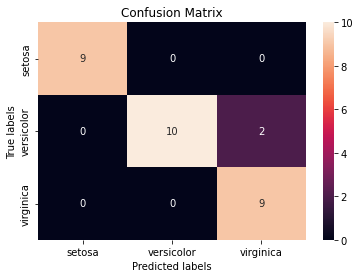

In [59]:
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(data.target_names)
ax.yaxis.set_ticklabels(data.target_names);